In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
import statsmodels.api as sm


Import Data

In [2]:
f_2014=pd.read_csv('/Users/renyinzhang/Downloads/OneDrive-2020-10-28-2/2014.csv')
f_2015=pd.read_csv('/Users/renyinzhang/Downloads/OneDrive-2020-10-28-2/2015.csv')
f_2016=pd.read_csv('/Users/renyinzhang/Downloads/OneDrive-2020-10-28-2/2016.csv')
f_2017=pd.read_csv('/Users/renyinzhang/Downloads/OneDrive-2020-10-28-2/2017.csv')
f_2018=pd.read_csv('/Users/renyinzhang/Downloads/OneDrive-2020-10-28-2/2018.csv')
stock_price=pd.read_csv('/Users/renyinzhang/Downloads/stock_prices_latest.csv')

Cleaning Stock Price Data

In [3]:
stock_price.date=pd.to_datetime(stock_price.date)
stock_price['Year']=stock_price.date.dt.year.astype('int')
stock_price_filtered=stock_price[stock_price.Year.isin([2015,2016,2017,2018,2019])]
stock_price_avg_year=stock_price_filtered.groupby(['symbol','Year'])['close_adjusted'].mean().to_frame().reset_index()
stock_price_avg_year=stock_price_avg_year.rename(columns={'close_adjusted':'next_year_avg_stock_price'})

Cleaning Financial Raitos Data

In [4]:
f_2014['Ratio_Year']=2014
f_2014['Stock_Price_Year']=2015
f_2015['Ratio_Year']=2015
f_2015['Stock_Price_Year']=2016
f_2016['Ratio_Year']=2016
f_2016['Stock_Price_Year']=2017
f_2017['Ratio_Year']=2017
f_2017['Stock_Price_Year']=2018
f_2018['Ratio_Year']=2018
f_2018['Stock_Price_Year']=2019
f_combined=pd.concat([f_2014,f_2015,f_2016,f_2017,f_2018])


Merge Stock Price Data and Financial Ratio Data

In [5]:
merge=pd.merge(f_combined,stock_price_avg_year,left_on=['Ticker','Stock_Price_Year'],right_on=['symbol','Year'],how='left')
merge.head(100)

,Ticker,EPS,EPS Diluted,EBITDA Margin,EBIT Margin,Free Cash Flow margin,Earnings Before Tax Margin,priceBookValueRatio,priceToSalesRatio,priceCashFlowRatio,...,Current ratio,Receivables Turnover,Sector,PRICE VAR [%],Class,Ratio_Year,Stock_Price_Year,symbol,Year,next_year_avg_stock_price
0,PG,4.1900,4.010,0.2470,0.2043,0.1359,0.1948,3.0391,2.8583,12.977501,...,0.9370,11.5404,Consumer Defensive,-9.323276,0,2014,2015,PG,2015.0,72.855352
1,VIPS,0.2396,0.226,0.0107,0.0502,0.0704,0.0470,NaN,0.0443,0.678615,...,0.2102,NaN,Consumer Defensive,-25.512193,0,2014,2015,VIPS,2015.0,21.823452
2,KR,1.4700,1.450,0.0450,0.0276,0.0126,0.0231,3.3579,0.1858,0.000000,...,0.8250,90.7937,Consumer Defensive,33.118297,1,2014,2015,KR,2015.0,35.646029
3,RAD,4.6000,4.600,0.0420,0.0264,0.0144,0.0098,0.0000,0.2491,0.000000,...,1.7090,27.1769,Consumer Defensive,2.752291,1,2014,2015,RAD,2015.0,7.977698
4,GIS,2.9000,2.830,0.2010,0.1681,0.1052,0.1512,5.1004,1.8610,10.952350,...,0.8100,12.2250,Consumer Defensive,12.897715,1,2014,2015,GIS,2015.0,51.551740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LANC,2.7500,2.740,0.1420,0.1223,0.1087,0.1223,4.9114,2.4988,17.600994,...,5.3180,18.2413,Consumer Defensive,32.947962,1,2014,2015,LANC,2015.0,89.255931
96,SAM,6.9600,6.690,0.2000,0.1612,-0.0118,0.1612,8.7944,4.2602,27.043337,...,1.8830,22.9012,Consumer Defensive,-27.958750,0,2014,2015,SAM,2015.0,246.276111
97,WMK,2.0200,2.020,0.0540,0.0301,0.0171,0.0301,1.5211,0.4628,9.282268,...,2.1210,43.4417,Consumer Defensive,-3.849133,0,2014,2015,WMK,2015.0,41.614766
98,STRA,4.3900,4.350,0.2300,0.1835,0.1593,0.1718,8.4740,1.8158,9.759224,...,3.4910,27.2109,Consumer Defensive,-17.224291,0,2014,2015,STRA,2015.0,54.384643


In [6]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 22076
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         22077 non-null  object 
 1   EPS                            20776 non-null  float64
 2   EPS Diluted                    20785 non-null  float64
 3   EBITDA Margin                  19630 non-null  float64
 4   EBIT Margin                    20403 non-null  float64
 5   Free Cash Flow margin          19786 non-null  float64
 6   Earnings Before Tax Margin     20882 non-null  float64
 7   priceBookValueRatio            17084 non-null  float64
 8   priceToSalesRatio              19794 non-null  float64
 9   priceCashFlowRatio             15013 non-null  float64
 10  priceSalesRatio                18720 non-null  float64
 11  enterpriseValueMultiple        15133 non-null  float64
 12  priceFairValue                 18503 non-null 

In [7]:
merge.isnull().sum()

Ticker                          0
EPS                          1301
EPS Diluted                  1292
EBITDA Margin                2447
EBIT Margin                  1674
                             ... 
Ratio_Year                      0
Stock_Price_Year                0
symbol                        215
Year                          215
next_year_avg_stock_price     215
Length: 64, dtype: int64

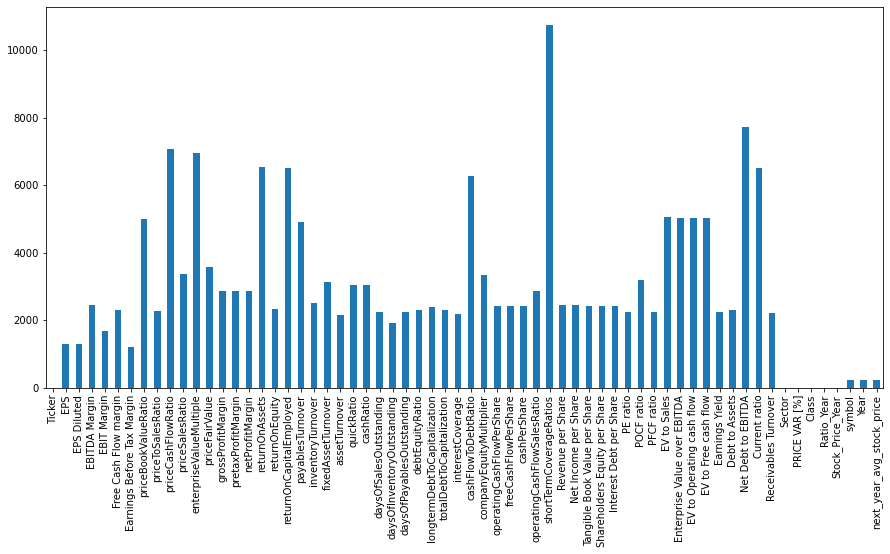

In [8]:
fig,ax=plt.subplots(figsize=(15,7))
merge.isnull().sum().plot(kind='bar')

Analyze Data

First analyze the stock price trend per sector

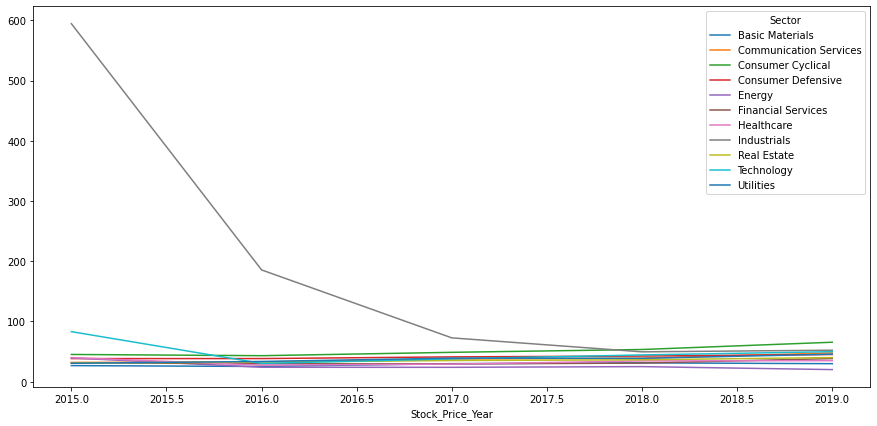

In [9]:
fig,ax=plt.subplots(figsize=(15,7))
merge.groupby(['Stock_Price_Year','Sector'])['next_year_avg_stock_price'].mean().unstack().plot(ax=ax)




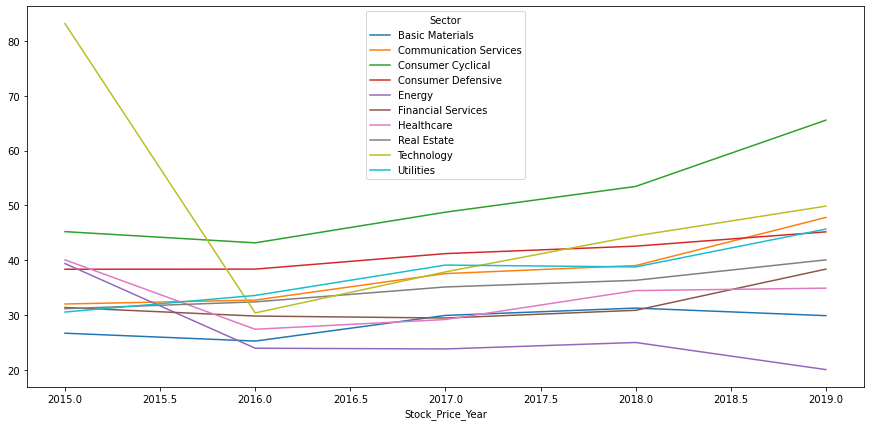

In [10]:
merge_wo_industrials=merge[merge.Sector!='Industrials']
fig,ax=plt.subplots(figsize=(15,7))
merge_wo_industrials.groupby(['Stock_Price_Year','Sector'])['next_year_avg_stock_price'].mean().unstack().plot(ax=ax)

Analyze Correlation by Sector

Basic statistics by sector

In [11]:
merge_basicmaterials=merge[merge.Sector=='Basic Materials']
merge_communicationservices=merge[merge.Sector=='Communication Services']
merge_consumercyclical=merge[merge.Sector=='Consumer Cyclical']
merge_consumerdefensive=merge[merge.Sector=='Consumer Defensive']
merge_energy=merge[merge.Sector=='Energy']
merge_financialservices=merge[merge.Sector=='Financial Services']
merge_healthcare=merge[merge.Sector=='Healthcare']
merge_realestate=merge[merge.Sector=='Real Estate']
merge_technology=merge[merge.Sector=='Technology']
merge_utilities=merge[merge.Sector=='Utilities']
merge_industrial=merge[merge.Sector=='Industrials']
print(merge_basicmaterials.describe(),
merge_communicationservices.describe(),
merge_consumercyclical.describe(),
merge_consumerdefensive.describe(),
merge_energy.describe(),
merge_financialservices.describe(),
merge_healthcare.describe(),
merge_industrial.describe(),
merge_realestate.describe(),
merge_technology.describe(),
merge_utilities.describe())

               EPS   EPS Diluted  EBITDA Margin  EBIT Margin  \
count  1326.000000   1329.000000    1215.000000  1311.000000   
mean     -3.671721     67.964581      -1.162090    -0.856892   
std      90.354075   2613.928712      13.493491    10.040309   
min   -3067.000000  -3067.000000    -315.519000  -234.615400   
25%      -0.154200     -0.160000       0.038500     0.000000   
50%       0.380000      0.370000       0.123000     0.063500   
75%       1.790000      1.780000       0.218166     0.139700   
max      51.020000  95231.443300      83.985400    97.590200   

       Free Cash Flow margin  Earnings Before Tax Margin  priceBookValueRatio  \
count            1286.000000                 1332.000000           891.000000   
mean               -0.649171                   -0.941407             3.585121   
std                 6.868271                   10.327271            19.753110   
min              -196.519200                 -236.269200             0.000000   
25%               

In [12]:
correlation_basicmaterial=merge_basicmaterials.corr(method='spearman')
correlation_communicationservices=merge_communicationservices.corr(method='spearman')
correlation_consumercyclical=merge_consumercyclical.corr(method='spearman')
correlation_consumerdefensive=merge_consumerdefensive.corr(method='spearman')
correlation_energy=merge_energy.corr(method='spearman')
correlation_financialservices=merge_financialservices.corr(method='spearman')
correlation_healthcare=merge_healthcare.corr(method='spearman')
correlation_industrial=merge_industrial.corr(method='spearman')
correlation_realestate=merge_realestate.corr(method='spearman')
correlation_technology=merge_technology.corr(method='spearman')
correlation_utilities=merge_utilities.corr(method='spearman')

top5_correlation_basicmaterial=correlation_basicmaterial.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_basicmaterial.columns=['Top5_Ratio','Correlation']

top5_correlation_communicationservices=correlation_communicationservices.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_communicationservices.columns=['Top5_Ratio','Correlation']

top5_correlation_consumercyclical=correlation_consumercyclical.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_consumercyclical.columns=['Top5_Ratio','Correlation']

top5_correlation_consumerdefensive=correlation_consumerdefensive.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_consumerdefensive.columns=['Top5_Ratio','Correlation']

top5_correlation_energy=correlation_energy.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_energy.columns=['Top5_Ratio','Correlation']

top5_correlation_financialservices=correlation_financialservices.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_financialservices.columns=['Top5_Ratio','Correlation']

top5_correlation_healthcare=correlation_healthcare.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_healthcare.columns=['Top5_Ratio','Correlation']

top5_correlation_industrial=correlation_industrial.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_industrial.columns=['Top5_Ratio','Correlation']

top5_correlation_realestate=correlation_realestate.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_realestate.columns=['Top5_Ratio','Correlation']

top5_correlation_technology=correlation_technology.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_technology.columns=['Top5_Ratio','Correlation']

top5_correlation_utilities=correlation_utilities.next_year_avg_stock_price.sort_values(ascending=False).head(6).to_frame().reset_index()
top5_correlation_utilities.columns=['Top5_Ratio','Correlation']

Top 5 Most Correlated Financial Ratios by Sectors

In [13]:
top5_correlation_basicmaterial

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,Tangible Book Value per Share,0.713436
2,operatingCashFlowPerShare,0.697857
3,Revenue per Share,0.670485
4,EPS,0.652642
5,EPS Diluted,0.648042


In [14]:
top5_correlation_communicationservices

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,Tangible Book Value per Share,0.551031
2,EPS,0.471205
3,EPS Diluted,0.470581
4,EV to Sales,0.467132
5,priceToSalesRatio,0.459479


In [15]:
top5_correlation_consumercyclical

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,EPS Diluted,0.698974
2,EPS,0.698429
3,Net Income per Share,0.692955
4,operatingCashFlowPerShare,0.659260
5,freeCashFlowPerShare,0.568822


In [16]:
top5_correlation_consumerdefensive

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,EPS Diluted,0.756702
2,EPS,0.756120
3,Net Income per Share,0.667581
4,operatingCashFlowPerShare,0.645190
5,Tangible Book Value per Share,0.639018


In [17]:
top5_correlation_energy

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,operatingCashFlowPerShare,0.668341
2,Tangible Book Value per Share,0.616612
3,Shareholders Equity per Share,0.551049
4,Revenue per Share,0.531503
5,Interest Debt per Share,0.455794


In [18]:
top5_correlation_financialservices

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,EPS Diluted,0.756834
2,EPS,0.756181
3,Net Income per Share,0.702725
4,Shareholders Equity per Share,0.651754
5,Revenue per Share,0.609043


In [19]:
top5_correlation_healthcare

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,Earnings Yield,0.595315
2,Tangible Book Value per Share,0.559762
3,PE ratio,0.533293
4,PFCF ratio,0.528064
5,Shareholders Equity per Share,0.522458


In [20]:
top5_correlation_industrial

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,EPS Diluted,0.732177
2,EPS,0.731536
3,Net Income per Share,0.718985
4,operatingCashFlowPerShare,0.677089
5,freeCashFlowPerShare,0.632758


In [21]:
top5_correlation_realestate

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,priceFairValue,0.653580
2,operatingCashFlowPerShare,0.642292
3,priceBookValueRatio,0.598919
4,Net Income per Share,0.554952
5,EPS Diluted,0.552220


In [22]:
top5_correlation_technology

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,operatingCashFlowPerShare,0.679695
2,freeCashFlowPerShare,0.630823
3,Tangible Book Value per Share,0.615820
4,operatingCashFlowSalesRatio,0.565851
5,EPS Diluted,0.553788


In [23]:
top5_correlation_utilities

,Top5_Ratio,Correlation
0,next_year_avg_stock_price,1.000000
1,EPS Diluted,0.738230
2,EPS,0.737648
3,Tangible Book Value per Share,0.687651
4,Net Income per Share,0.449862
5,Earnings Before Tax Margin,0.414700


In [24]:
merge_basicmaterials=merge_basicmaterials.dropna()
rp_listing=[]
for r in top5_correlation_basicmaterial['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_basicmaterials[r],
                         merge_basicmaterials['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.5271036798329234, 2.210615438409804e-37),
 (0.6685352761135201, 1.4492307236738862e-66),
 (0.5417123975082182, 8.913790797228162e-40),
 (0.6621754628180168, 6.617357891452262e-65),
 (0.6634511588570245, 3.0979207616192844e-65)]

In [25]:
merge_communicationservices=merge_communicationservices.dropna()
rp_listing=[]
for r in top5_correlation_communicationservices['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_communicationservices[r],
                         merge_communicationservices['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.6612881761926942, 1.5609037361265154e-15),
 (0.6061037052465527, 1.1310835304774986e-12),
 (0.6122249532428641, 5.800973783768461e-13),
 (0.24762958280657396, 0.008183831926870949),
 (0.38992115243861875, 1.9628694238270108e-05)]

In [26]:
merge_consumerdefensive=merge_consumerdefensive.dropna()
rp_listing=[]
for r in top5_correlation_consumerdefensive['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_consumerdefensive[r],
                         merge_consumerdefensive['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(0.9999999999999998, 0.0),
 (0.7636115773903118, 1.1358382128299072e-88),
 (0.7628011493013587, 2.2343739252634537e-88),
 (0.7675137539038525, 4.2050356302765685e-90),
 (0.7866048326904679, 1.5576282334619385e-97),
 (0.6003603068416342, 3.421663955721288e-46)]

In [27]:
merge_energy=merge_energy.dropna()
rp_listing=[]
for r in top5_correlation_energy['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_energy[r],
                         merge_energy['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.7234651390360699, 1.326335604927862e-58),
 (0.6963281006440043, 1.2055852586116101e-52),
 (0.6754050082203039, 1.7321732077583605e-48),
 (0.4503789433677979, 4.385109599921169e-19),
 (0.4764272000660032, 1.8516766307801798e-21)]

In [28]:
merge_financialservices=merge_financialservices.dropna()
rp_listing=[]
for r in top5_correlation_financialservices['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_financialservices[r],
                         merge_financialservices['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.8285091609327725, 7.313605537603149e-23),
 (0.8365253984783337, 1.1659270716562298e-23),
 (0.828973064767206, 6.593473401999711e-23),
 (0.6830605217227227, 4.321615465269607e-13),
 (0.6131326949384405, 3.4888411468768376e-10)]

In [29]:
merge_healthcare=merge_healthcare.dropna()
rp_listing=[]
for r in top5_correlation_healthcare['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_healthcare[r],
                         merge_healthcare['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.19528234800361105, 2.9760097445208958e-06),
 (0.6423842537994873, 5.97694989339784e-67),
 (0.3072133637792299, 8.593300891696863e-14),
 (0.22844171934951835, 4.1147101373354045e-08),
 (0.7624114494500916, 2.55421218604838e-108)]

In [30]:
merge_industrial=merge_industrial.dropna()
rp_listing=[]
for r in top5_correlation_industrial['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_industrial[r],
                         merge_industrial['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.7537533165079652, 1.8627600893892185e-235),
 (0.7514027941279041, 3.447505139097973e-233),
 (0.7502320798388443, 4.5427139643653126e-232),
 (0.7190815012657917, 2.1406370341888205e-204),
 (0.6633015371529181, 3.220555520220368e-163)]

In [31]:
merge_realestate=merge_realestate.dropna()
rp_listing=[]
for r in top5_correlation_realestate['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_realestate[r],
                         merge_realestate['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.5864803159323708, 4.9758803614872263e-08),
 (0.7622794026903617, 4.726095281666326e-15),
 (0.4979637171417994, 7.3700273260225785e-06),
 (0.6093113661606813, 1.0619280021944586e-08),
 (0.6183489925013035, 5.56706387161227e-09)]

In [32]:
merge_technology=merge_technology.dropna()
rp_listing=[]
for r in top5_correlation_technology['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_technology[r],
                         merge_technology['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.7951407862986185, 7.850624942908716e-192),
 (0.7368916302038738, 1.2973652855355242e-150),
 (0.5875997543758101, 2.352089772307816e-82),
 (0.3705384067673651, 7.286110255686979e-30),
 (0.6732435901698224, 1.3961879339540078e-116)]

In [33]:
merge_utilities=merge_utilities.dropna()
rp_listing=[]
for r in top5_correlation_utilities['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_utilities[r],
                         merge_utilities['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.7770779935154986, 4.1393873456477243e-66),
 (0.7764884554097513, 5.987252635197362e-66),
 (0.7261052283670428, 7.840360248474355e-54),
 (0.778200896321992, 2.0429769015543531e-66),
 (0.3086659046593814, 1.6316303757147028e-08)]

In [34]:
merge_consumercyclical=merge_consumercyclical.dropna()
rp_listing=[]
for r in top5_correlation_consumercyclical['Top5_Ratio']:
    r,p=scipy.stats.spearmanr(merge_consumercyclical[r],
                         merge_consumercyclical['next_year_avg_stock_price'])
    rp_listing.append((r,p))
rp_listing

[(1.0, 0.0),
 (0.7081861648593883, 1.3000117898089358e-170),
 (0.7083250639925156, 1.0431874368807699e-170),
 (0.7036366934259068, 1.6362320646060342e-167),
 (0.7146463817448379, 4.0524301495475785e-175),
 (0.6216483751636143, 2.617987970231541e-120)]

Insights

Stock Price Trend by Sectors

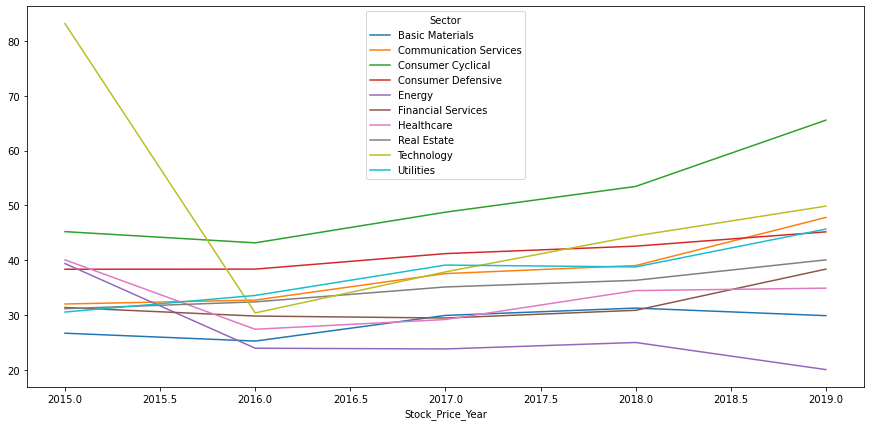

In [35]:
merge_wo_industrials=merge[merge.Sector!='Industrials']
fig,ax=plt.subplots(figsize=(15,7))
merge_wo_industrials.groupby(['Stock_Price_Year','Sector'])['next_year_avg_stock_price'].mean().unstack().plot(ax=ax)

Industrials stock price decreased sharply compared to other sectors from 2015 and 2019 and thus, it is considered as outlier. The plot above shows stock price trend by sector without Industrials sector. Per the plot, we can see that most sectors are trending upwards except Energy, and Consumer Cyclical increased the most throughout the years among the sectors. We should consider reduce the percentage of holdings in Industrials and Energy sectors in our investment portfolios. 

Stock Price and Financial Ratios Correlations by Sectors

Basic Materials

Text(0.5, 1.08, 'Basic Materials')

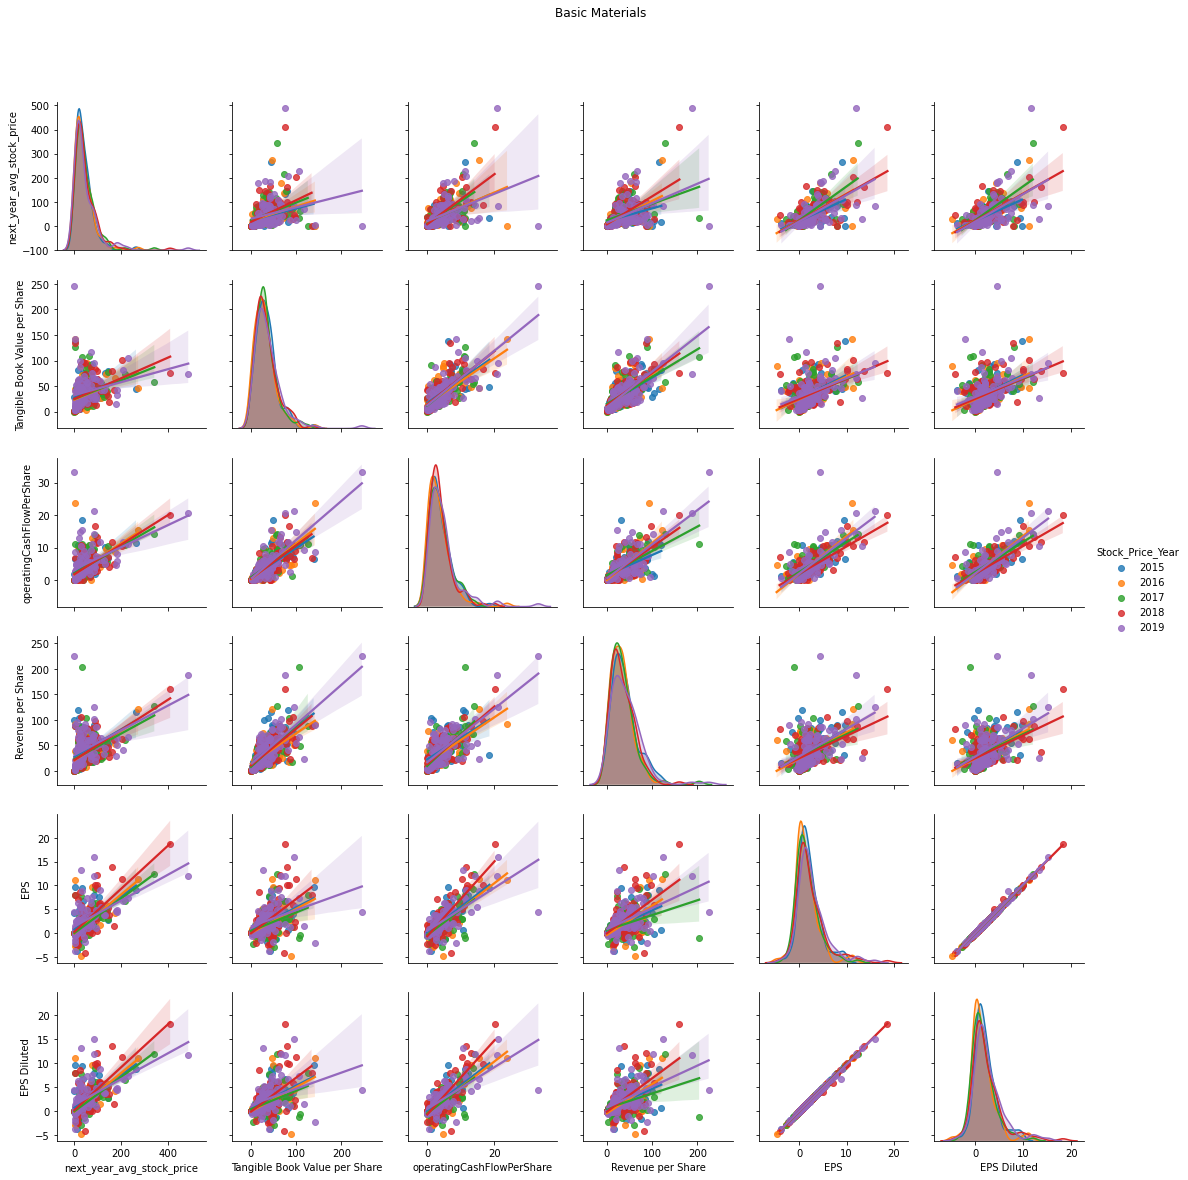

In [36]:
top5_corr_bm=pd.concat([merge_basicmaterials[top5_correlation_basicmaterial.Top5_Ratio],
                        merge_basicmaterials.Stock_Price_Year],axis='columns')
basicmaterials=sns.pairplot(top5_corr_bm,hue='Stock_Price_Year',kind='reg',dropna=True)
basicmaterials.fig.suptitle('Basic Materials',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [37]:
top5_correlation_basicmaterial=top5_correlation_basicmaterial[1:]
X=merge_basicmaterials[top5_correlation_basicmaterial['Top5_Ratio']]
Y=merge_basicmaterials['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.440
Model:                                   OLS   Adj. R-squared:                  0.435
Method:                        Least Squares   F-statistic:                     78.30
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           1.64e-60
Time:                               21:10:07   Log-Likelihood:                -2540.1
No. Observations:                        504   AIC:                             5092.
Df Residuals:                            498   BIC:                             5117.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            14.6438      2.944      4.974      0.000       8.859      20.428
Tangible Book Value per Share    -0.2688      0.104     -2.572      0.010      -0.474      -0.063
operatingCashFlowPerShare         1.8046      0.938      1.924      0.055      -0.038       3.648
Revenue per Share                 0.3910      0.086      4.520      0.000       0.221       0.561
EPS                             -14.1026     13.873     -1.017      0.310     -41.359      13.154
EPS Diluted                      22.9664     14.018      1.638      0.102      -4.576      50.508
==============================================================================
Omnibus:                      189.757   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2056.033
Skew:                           1.318   Prob(JB):                         0.00
Kurtosis:                      12.537   Cond. No.                         732.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 44% of the stock price in basic material sector. Thus, we should not rely heavily on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Communication Services

Text(0.5, 1.08, 'Communication Services')

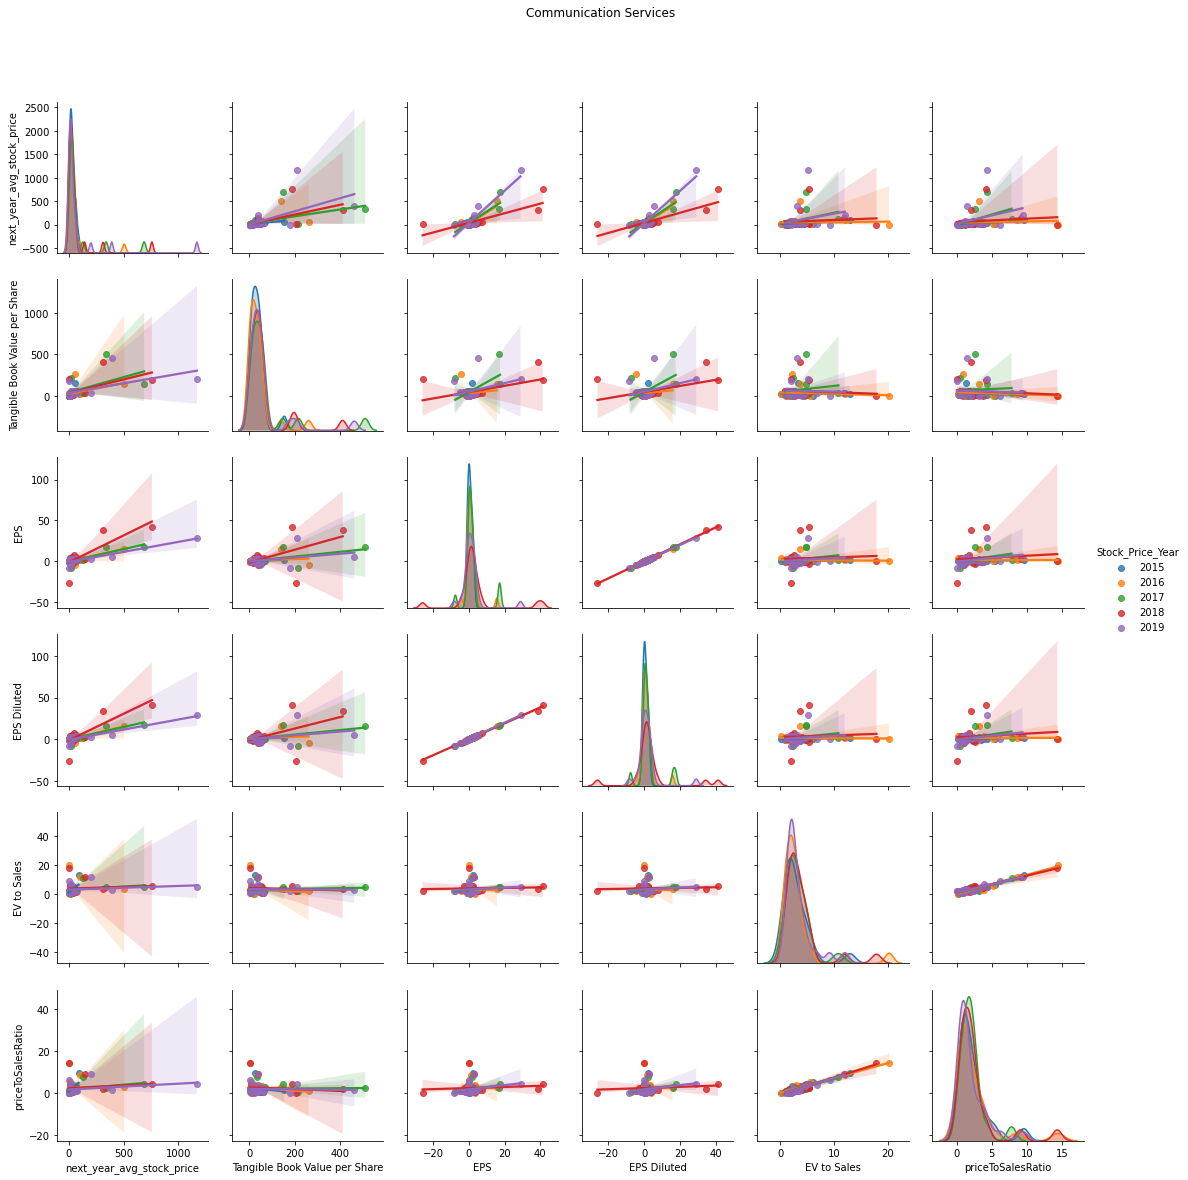

In [38]:
communicationservices=sns.pairplot(pd.concat([merge_communicationservices[top5_correlation_communicationservices.Top5_Ratio],
                        merge_communicationservices.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
communicationservices.fig.suptitle('Communication Services',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [39]:
top5_correlation_communicationservices=top5_correlation_communicationservices[1:]
X=merge_communicationservices[top5_correlation_communicationservices['Top5_Ratio']]
Y=merge_communicationservices['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.785
Model:                                   OLS   Adj. R-squared:                  0.775
Method:                        Least Squares   F-statistic:                     78.09
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           4.22e-34
Time:                               21:10:31   Log-Likelihood:                -643.81
No. Observations:                        113   AIC:                             1300.
Df Residuals:                            107   BIC:                             1316.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -14.9166     11.642     -1.281      0.203     -37.995       8.162
Tangible Book Value per Share     0.8721      0.105      8.311      0.000       0.664       1.080
EPS                            -158.7698     21.540     -7.371      0.000    -201.470    -116.070
EPS Diluted                     177.0804     22.171      7.987      0.000     133.128     221.032
EV to Sales                      -2.3203      8.285     -0.280      0.780     -18.745      14.105
priceToSalesRatio                 9.6605     10.806      0.894      0.373     -11.762      31.083
==============================================================================
Omnibus:                      115.833   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2070.430
Skew:                           3.384   Prob(JB):                         0.00
Kurtosis:                      22.848   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can explain 79% of the stock price in communication service sector which is much better than basic material sector. Thus, the combination of top 5 financial ratios is considered a good indicator for future stock price in communication service sector.

Text(0.5, 1.08, 'Consumer Cyclical')

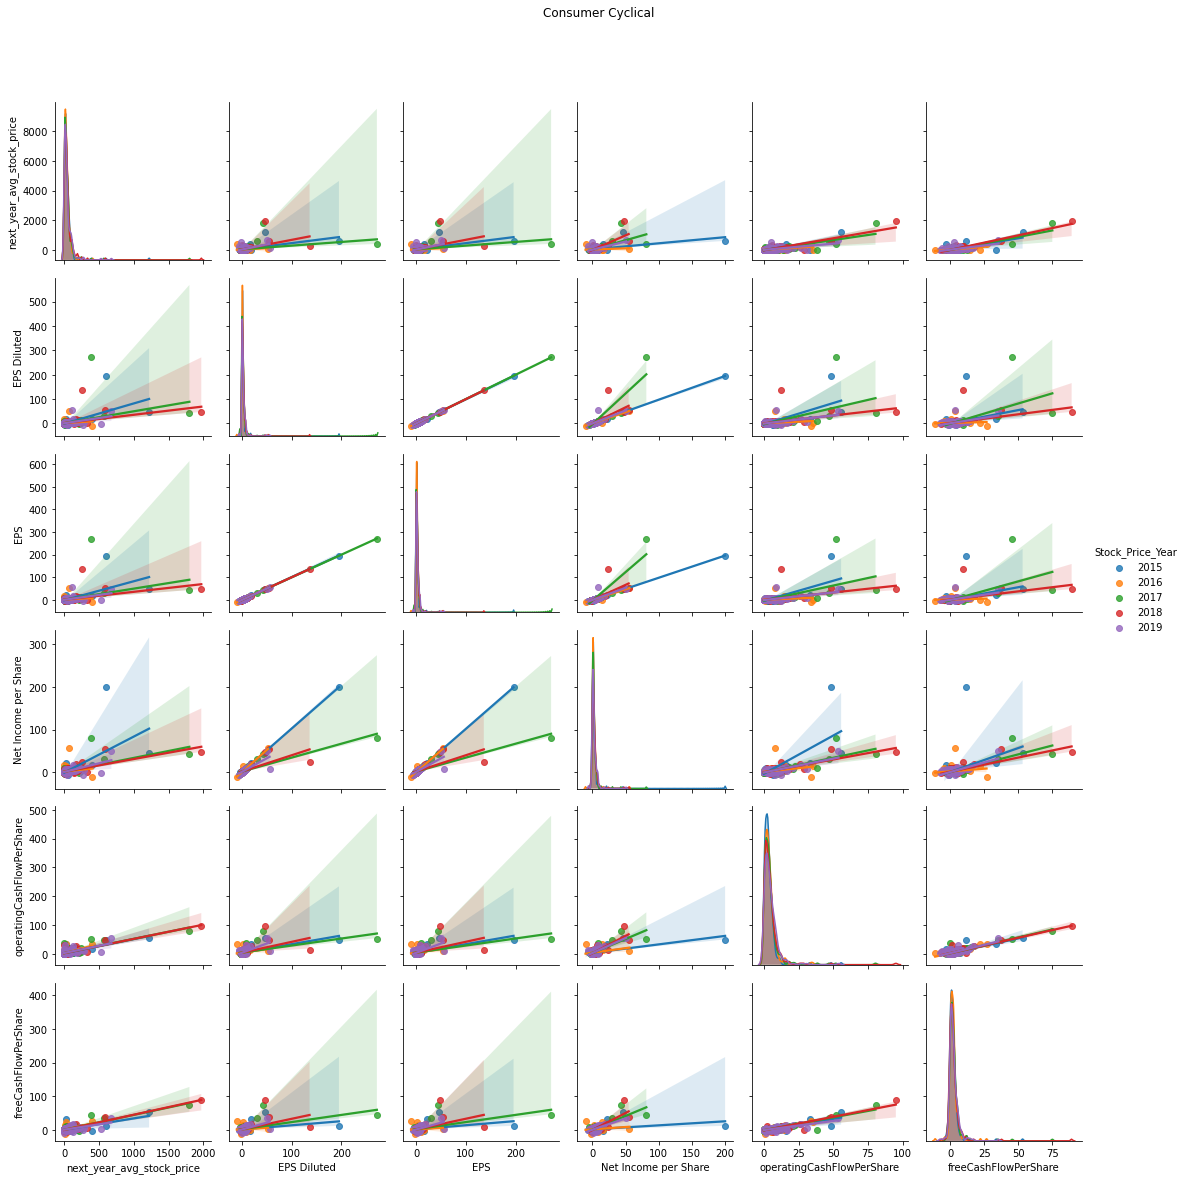

In [40]:
consumercyclical=sns.pairplot(pd.concat([merge_consumercyclical[top5_correlation_consumercyclical.Top5_Ratio],
                        merge_consumercyclical.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
consumercyclical.fig.suptitle('Consumer Cyclical',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [41]:
top5_correlation_consumercyclical=top5_correlation_consumercyclical[1:]
X=merge_consumercyclical[top5_correlation_consumercyclical['Top5_Ratio']]
Y=merge_consumercyclical['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.737
Model:                                   OLS   Adj. R-squared:                  0.735
Method:                        Least Squares   F-statistic:                     620.7
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):          1.92e-318
Time:                               21:11:08   Log-Likelihood:                -6013.8
No. Observations:                       1116   AIC:                         1.204e+04
Df Residuals:                           1110   BIC:                         1.207e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9981      2.040      0.489      0.625      -3.005       5.001
EPS Diluted                  78.6564     13.895      5.661      0.000      51.394     105.919
EPS                         -80.3360     13.943     -5.762      0.000    -107.693     -52.979
Net Income per Share          3.4903      0.429      8.126      0.000       2.648       4.333
operatingCashFlowPerShare     4.0775      0.601      6.782      0.000       2.898       5.257
freeCashFlowPerShare         12.0012      0.667     17.990      0.000      10.692      13.310
==============================================================================
Omnibus:                      692.935   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43564.990
Skew:                           2.100   Prob(JB):                         0.00
Kurtosis:                      33.319   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can explain 74% of the stock price in consumer cyclical sector. Thus, the combination of top 5 financial ratios is considered a good indicator for future stock price in consumer cyclical sector.

Text(0.5, 1.08, 'Consumer Defensive')

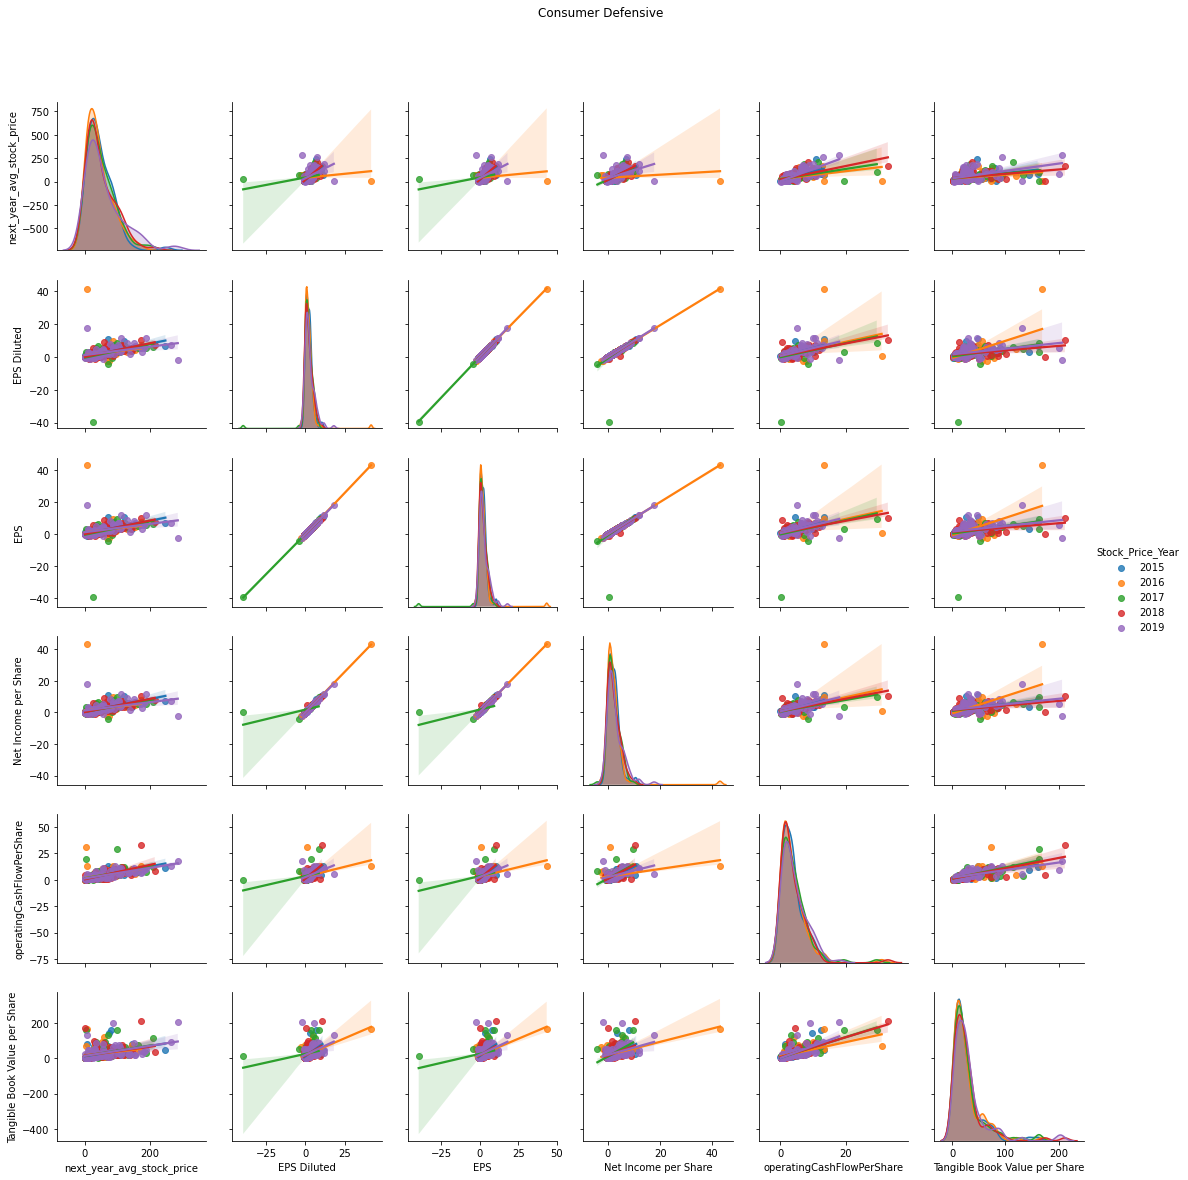

In [42]:
consumerdefensive=sns.pairplot(pd.concat([merge_consumerdefensive[top5_correlation_consumerdefensive.Top5_Ratio],
                        merge_consumerdefensive.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
consumerdefensive.fig.suptitle('Consumer Defensive',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [43]:
top5_correlation_consumerdefensive=top5_correlation_consumerdefensive[1:]
X=merge_consumerdefensive[top5_correlation_consumerdefensive['Top5_Ratio']]
Y=merge_consumerdefensive['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.457
Model:                                   OLS   Adj. R-squared:                  0.451
Method:                        Least Squares   F-statistic:                     76.12
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           8.84e-58
Time:                               21:11:40   Log-Likelihood:                -2249.6
No. Observations:                        458   AIC:                             4511.
Df Residuals:                            452   BIC:                             4536.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            19.5449      2.312      8.454      0.000      15.001      24.088
EPS Diluted                      70.1801     17.183      4.084      0.000      36.413     103.948
EPS                             -70.2447     17.203     -4.083      0.000    -104.053     -36.437
Net Income per Share              4.9762      1.138      4.373      0.000       2.740       7.212
operatingCashFlowPerShare         6.9421      0.600     11.575      0.000       5.763       8.121
Tangible Book Value per Share    -0.1806      0.073     -2.478      0.014      -0.324      -0.037
==============================================================================
Omnibus:                       95.190   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1877.517
Skew:                           0.211   Prob(JB):                         0.00
Kurtosis:                      12.910   Cond. No.                         669.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 46% of the stock price in consumer defensive sector. Thus, we should not rely heavily on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Text(0.5, 1.08, 'Energy')

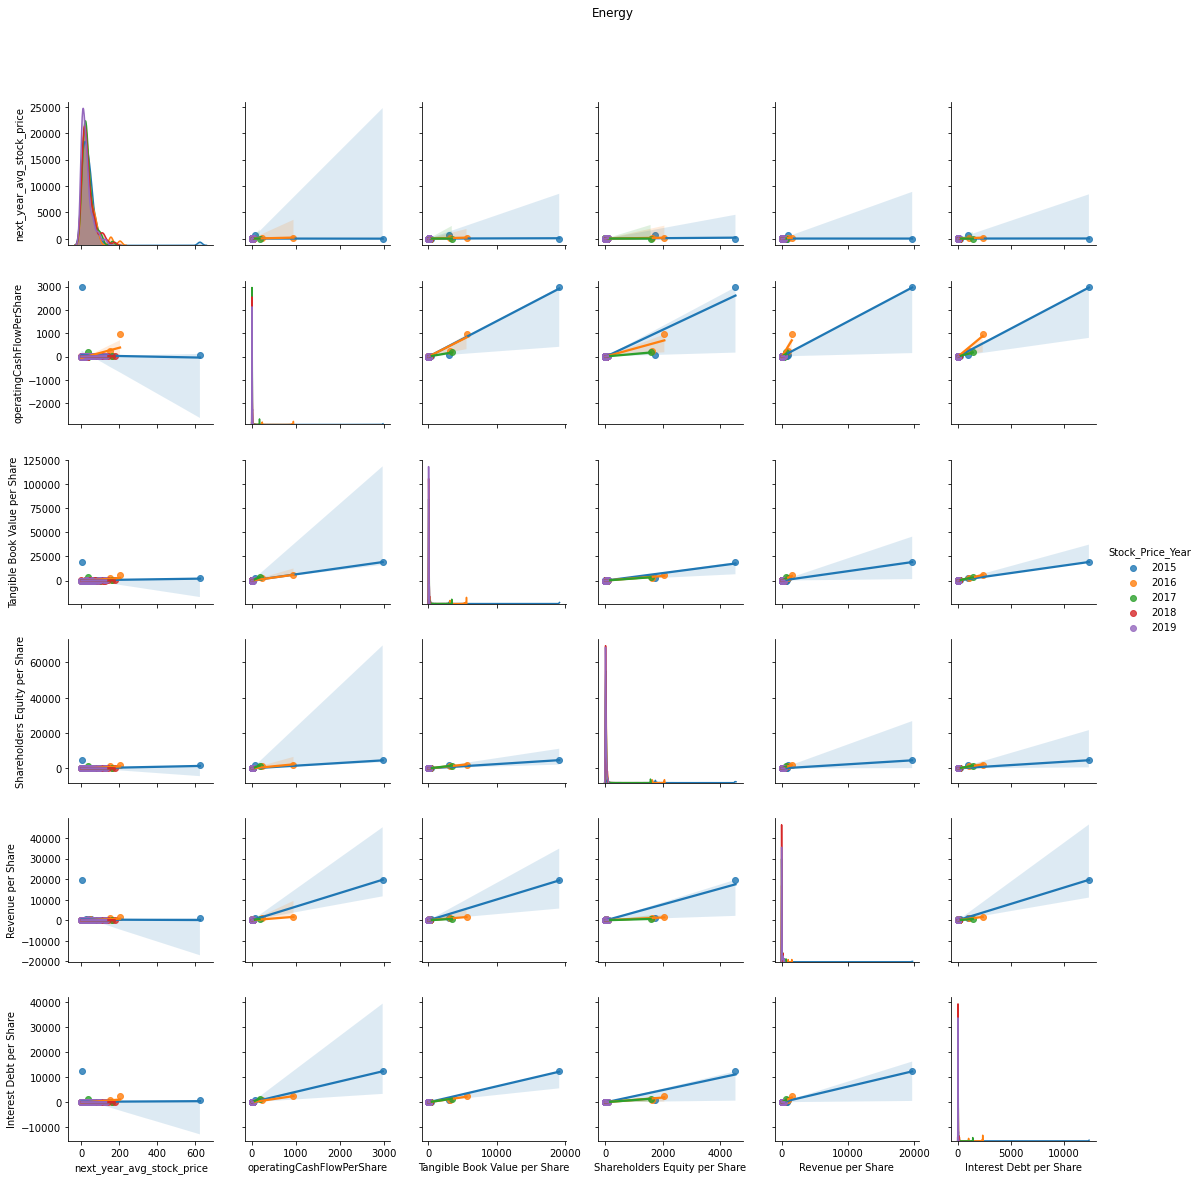

In [44]:
energy=sns.pairplot(pd.concat([merge_energy[top5_correlation_energy.Top5_Ratio],
                        merge_energy.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
energy.fig.suptitle('Energy',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [45]:
top5_correlation_energy=top5_correlation_energy[1:]
X=merge_energy[top5_correlation_energy['Top5_Ratio']]
Y=merge_energy['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.468
Model:                                   OLS   Adj. R-squared:                  0.460
Method:                        Least Squares   F-statistic:                     61.24
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           1.13e-45
Time:                               21:12:10   Log-Likelihood:                -1732.5
No. Observations:                        354   AIC:                             3477.
Df Residuals:                            348   BIC:                             3500.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            25.4588      1.917     13.283      0.000      21.689      29.228
operatingCashFlowPerShare         0.3104      0.128      2.429      0.016       0.059       0.562
Tangible Book Value per Share    -0.2056      0.091     -2.262      0.024      -0.384      -0.027
Shareholders Equity per Share     0.5785      0.115      5.033      0.000       0.352       0.805
Revenue per Share                 0.1107      0.016      6.801      0.000       0.079       0.143
Interest Debt per Share          -0.1474      0.087     -1.693      0.091      -0.319       0.024
==============================================================================
Omnibus:                      122.157   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2244.991
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      15.196   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 46% of the stock price in energy sector. Thus, we should not rely heavily on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Text(0.5, 1.08, 'Financial Services')

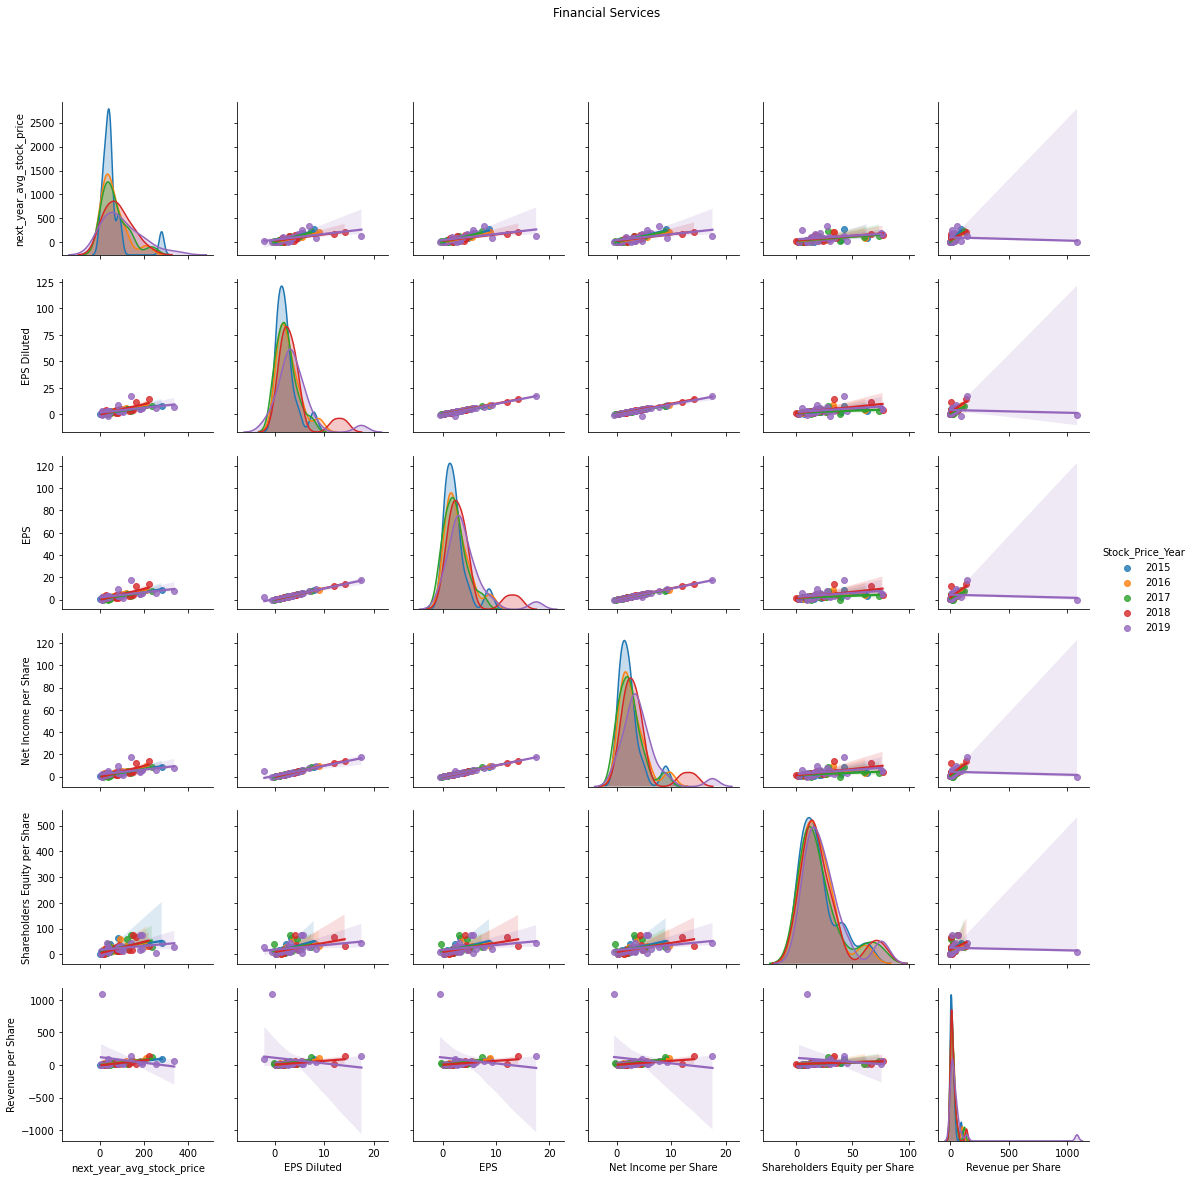

In [46]:
financialservices=sns.pairplot(pd.concat([merge_financialservices[top5_correlation_financialservices.Top5_Ratio],
                        merge_financialservices.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
financialservices.fig.suptitle('Financial Services',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [47]:
top5_correlation_financialservices=top5_correlation_financialservices[1:]
X=merge_financialservices[top5_correlation_financialservices['Top5_Ratio']]
Y=merge_financialservices['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.573
Model:                                   OLS   Adj. R-squared:                  0.546
Method:                        Least Squares   F-statistic:                     21.48
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           1.45e-13
Time:                               21:12:38   Log-Likelihood:                -449.79
No. Observations:                         86   AIC:                             911.6
Df Residuals:                             80   BIC:                             926.3
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            14.8109      8.596      1.723      0.089      -2.296      31.917
EPS Diluted                      11.8208     15.213      0.777      0.439     -18.453      42.095
EPS                             -30.3671     36.277     -0.837      0.405    -102.560      41.826
Net Income per Share             32.9622     23.592      1.397      0.166     -13.987      79.911
Shareholders Equity per Share     0.7419      0.315      2.352      0.021       0.114       1.369
Revenue per Share                 0.0047      0.044      0.107      0.915      -0.082       0.091
==============================================================================
Omnibus:                       37.537   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.295
Skew:                           1.256   Prob(JB):                     6.98e-35
Kurtosis:                       9.131   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 57% of the stock price in financial services sector. Thus, we should not rely heavily on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Text(0.5, 1.08, 'Healthcare')

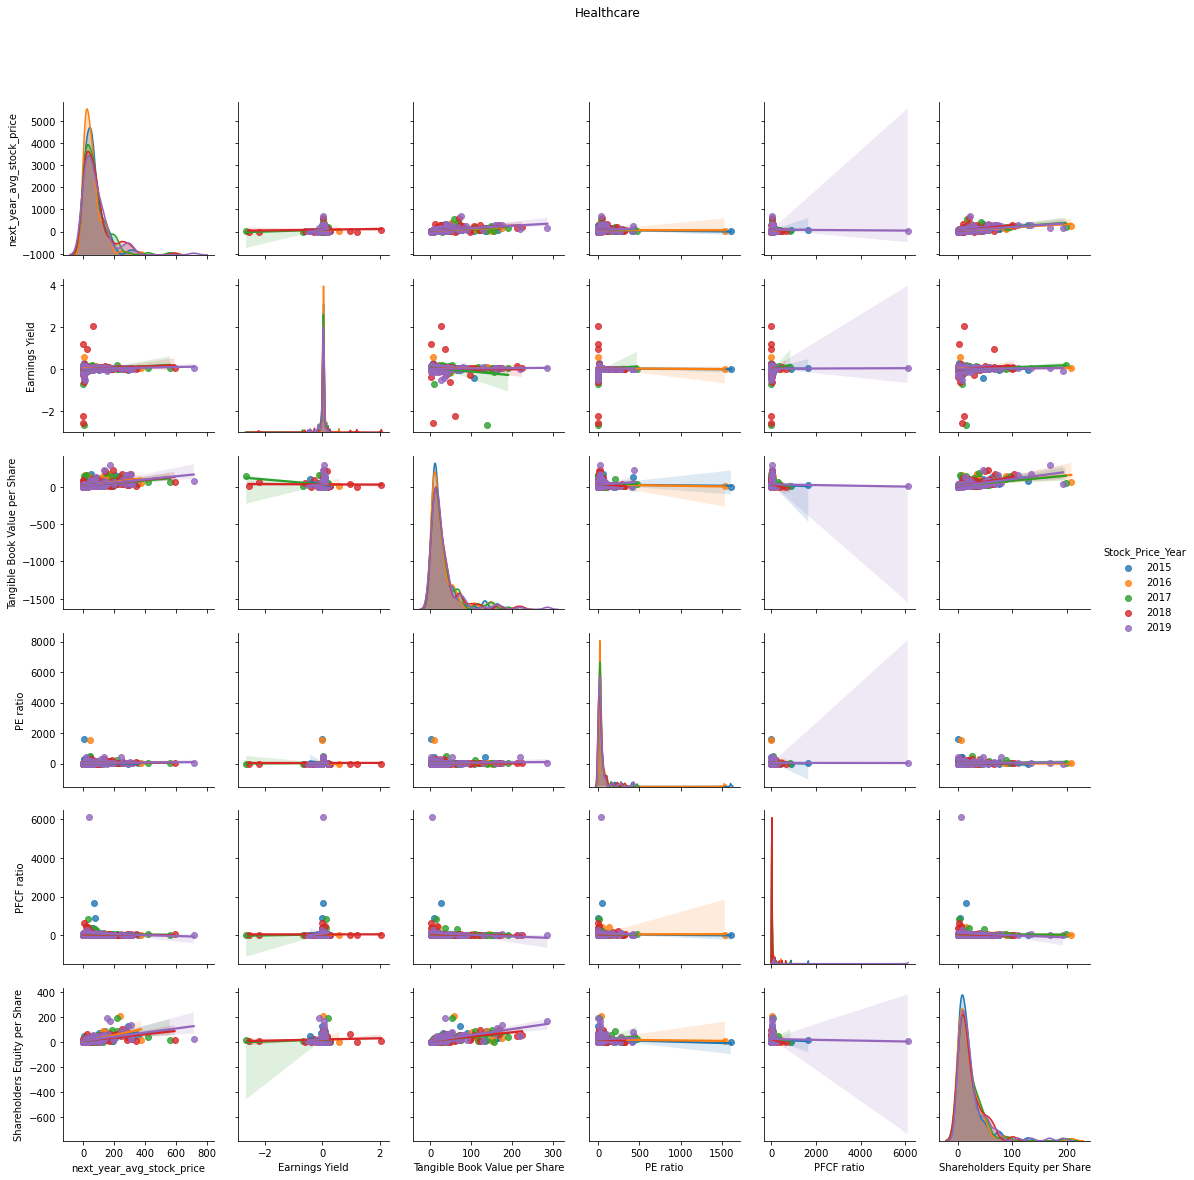

In [48]:
healthcare=sns.pairplot(pd.concat([merge_healthcare[top5_correlation_healthcare.Top5_Ratio],
                        merge_healthcare.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
healthcare.fig.suptitle('Healthcare',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [49]:
top5_correlation_healthcare=top5_correlation_healthcare[1:]
X=merge_healthcare[top5_correlation_healthcare['Top5_Ratio']]
Y=merge_healthcare['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.339
Model:                                   OLS   Adj. R-squared:                  0.333
Method:                        Least Squares   F-statistic:                     57.24
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           4.76e-48
Time:                               21:13:10   Log-Likelihood:                -3168.1
No. Observations:                        564   AIC:                             6348.
Df Residuals:                            558   BIC:                             6374.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            29.8842      4.160      7.184      0.000      21.713      38.056
Earnings Yield                   23.2063     12.465      1.862      0.063      -1.278      47.690
Tangible Book Value per Share     0.3955      0.093      4.244      0.000       0.212       0.579
PE ratio                          0.0196      0.026      0.767      0.443      -0.031       0.070
PFCF ratio                        0.0017      0.010      0.167      0.867      -0.018       0.022
Shareholders Equity per Share     1.5027      0.141     10.675      0.000       1.226       1.779
==============================================================================
Omnibus:                      494.738   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16394.388
Skew:                           3.723   Prob(JB):                         0.00
Kurtosis:                      28.341   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 34% of the stock price in healthcare sector. Thus, we should not rely on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Text(0.5, 1.08, 'Industrials')

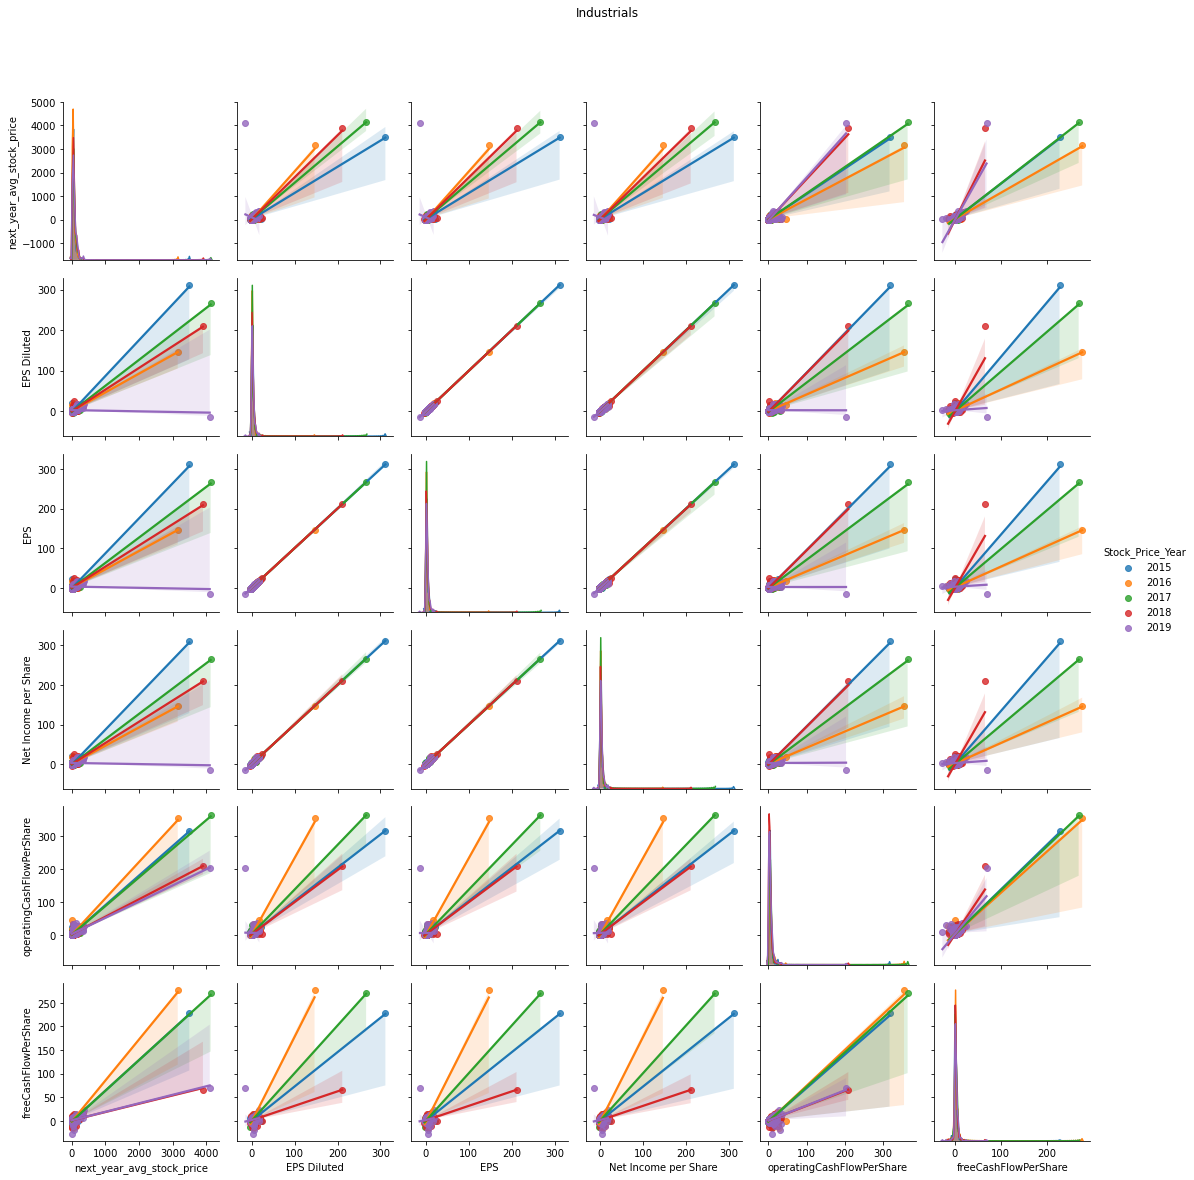

In [50]:
industrial=sns.pairplot(pd.concat([merge_industrial[top5_correlation_industrial.Top5_Ratio],
                        merge_industrial.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
industrial.fig.suptitle('Industrials',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [51]:
top5_correlation_industrial=top5_correlation_industrial[1:]
X=merge_industrial[top5_correlation_industrial['Top5_Ratio']]
Y=merge_industrial['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.882
Model:                                   OLS   Adj. R-squared:                  0.882
Method:                        Least Squares   F-statistic:                     1909.
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                               21:13:50   Log-Likelihood:                -7454.5
No. Observations:                       1281   AIC:                         1.492e+04
Df Residuals:                           1275   BIC:                         1.495e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0313      2.459     -0.013      0.990      -4.855       4.792
EPS Diluted                  56.1399     13.317      4.216      0.000      30.014      82.266
EPS                         -43.2105     14.102     -3.064      0.002     -70.876     -15.545
Net Income per Share        -11.8943      4.971     -2.393      0.017     -21.646      -2.143
operatingCashFlowPerShare    14.3193      0.376     38.107      0.000      13.582      15.056
freeCashFlowPerShare         -5.0238      0.503     -9.997      0.000      -6.010      -4.038
==============================================================================
Omnibus:                     1482.360   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938482.362
Skew:                           5.044   Prob(JB):                         0.00
Kurtosis:                     135.216   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can explain 88% of the stock price in industrials sector. Thus, the combination of top 5 financial ratios is considered a good indicator for future stock price in this sector.

Text(0.5, 1.08, 'Realestate')

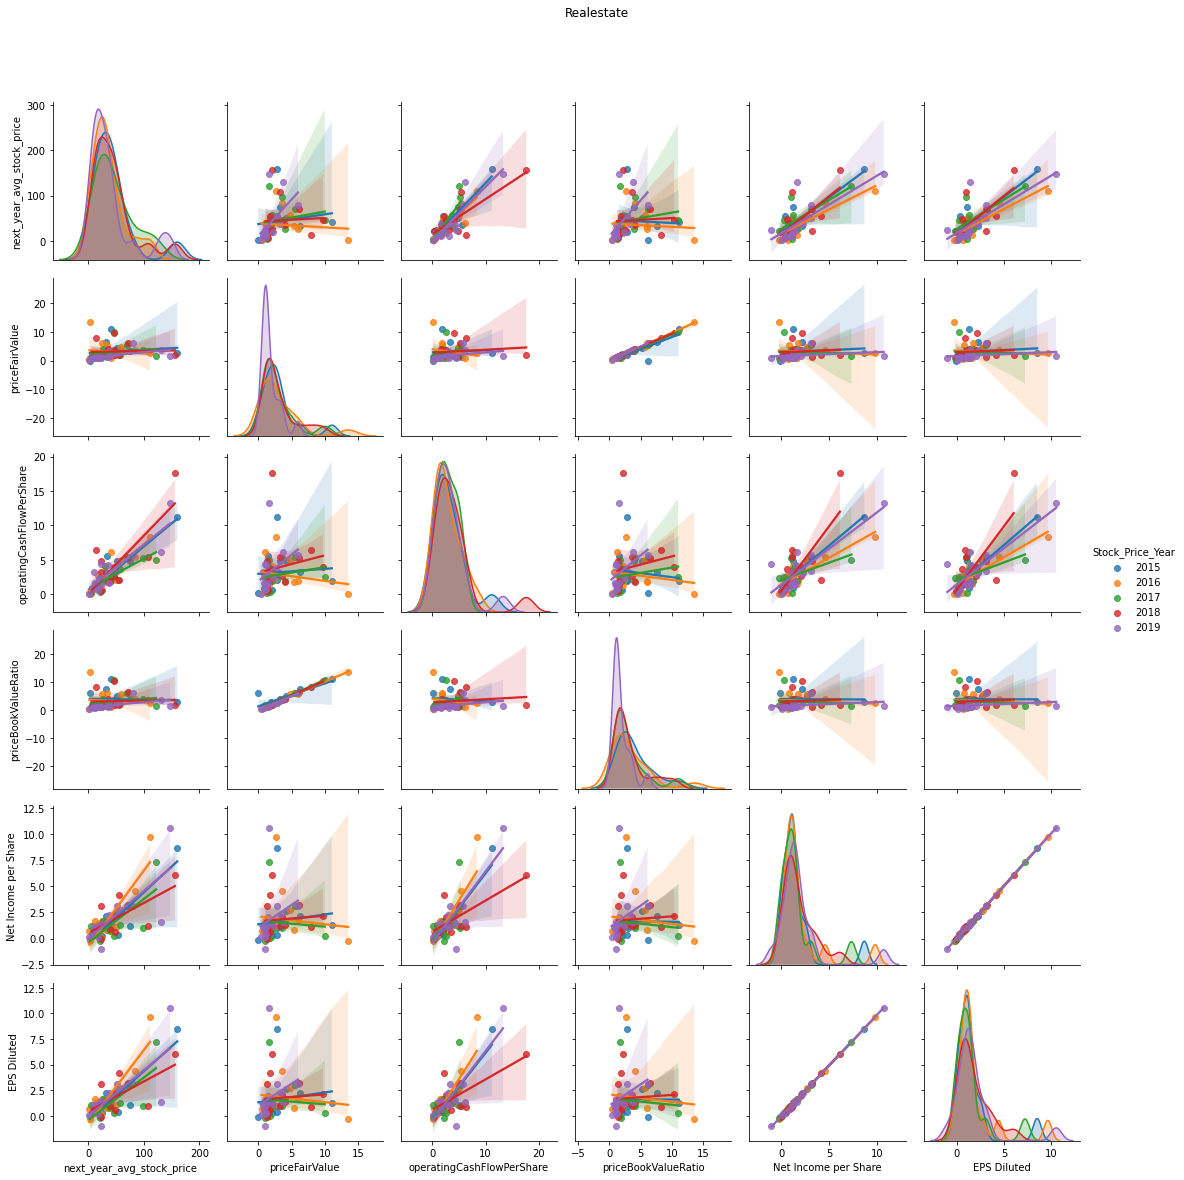

In [52]:
realestate=sns.pairplot(pd.concat([merge_realestate[top5_correlation_realestate.Top5_Ratio],
                        merge_realestate.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
realestate.fig.suptitle('Realestate',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [53]:
top5_correlation_realestate=top5_correlation_realestate[1:]
X=merge_realestate[top5_correlation_realestate['Top5_Ratio']]
Y=merge_realestate['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.752
Model:                                   OLS   Adj. R-squared:                  0.733
Method:                        Least Squares   F-statistic:                     40.62
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           5.31e-19
Time:                               21:14:24   Log-Likelihood:                -315.34
No. Observations:                         73   AIC:                             642.7
Df Residuals:                             67   BIC:                             656.4
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.0333      4.246      1.185      0.240      -3.442      13.509
priceFairValue                1.6863      3.108      0.543      0.589      -4.517       7.890
operatingCashFlowPerShare     6.8429      1.154      5.929      0.000       4.539       9.146
priceBookValueRatio          -0.6176      2.978     -0.207      0.836      -6.561       5.326
Net Income per Share         43.9480     36.490      1.204      0.233     -28.886     116.782
EPS Diluted                 -38.1338     36.482     -1.045      0.300    -110.952      34.684
==============================================================================
Omnibus:                       10.576   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.479
Skew:                           0.483   Prob(JB):                     0.000160
Kurtosis:                       5.194   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can explain 75% of the stock price in realestate sector. Thus, the combination of top 5 financial ratios is considered a good indicator for future stock price in this sector.

Text(0.5, 1.08, 'Technology')

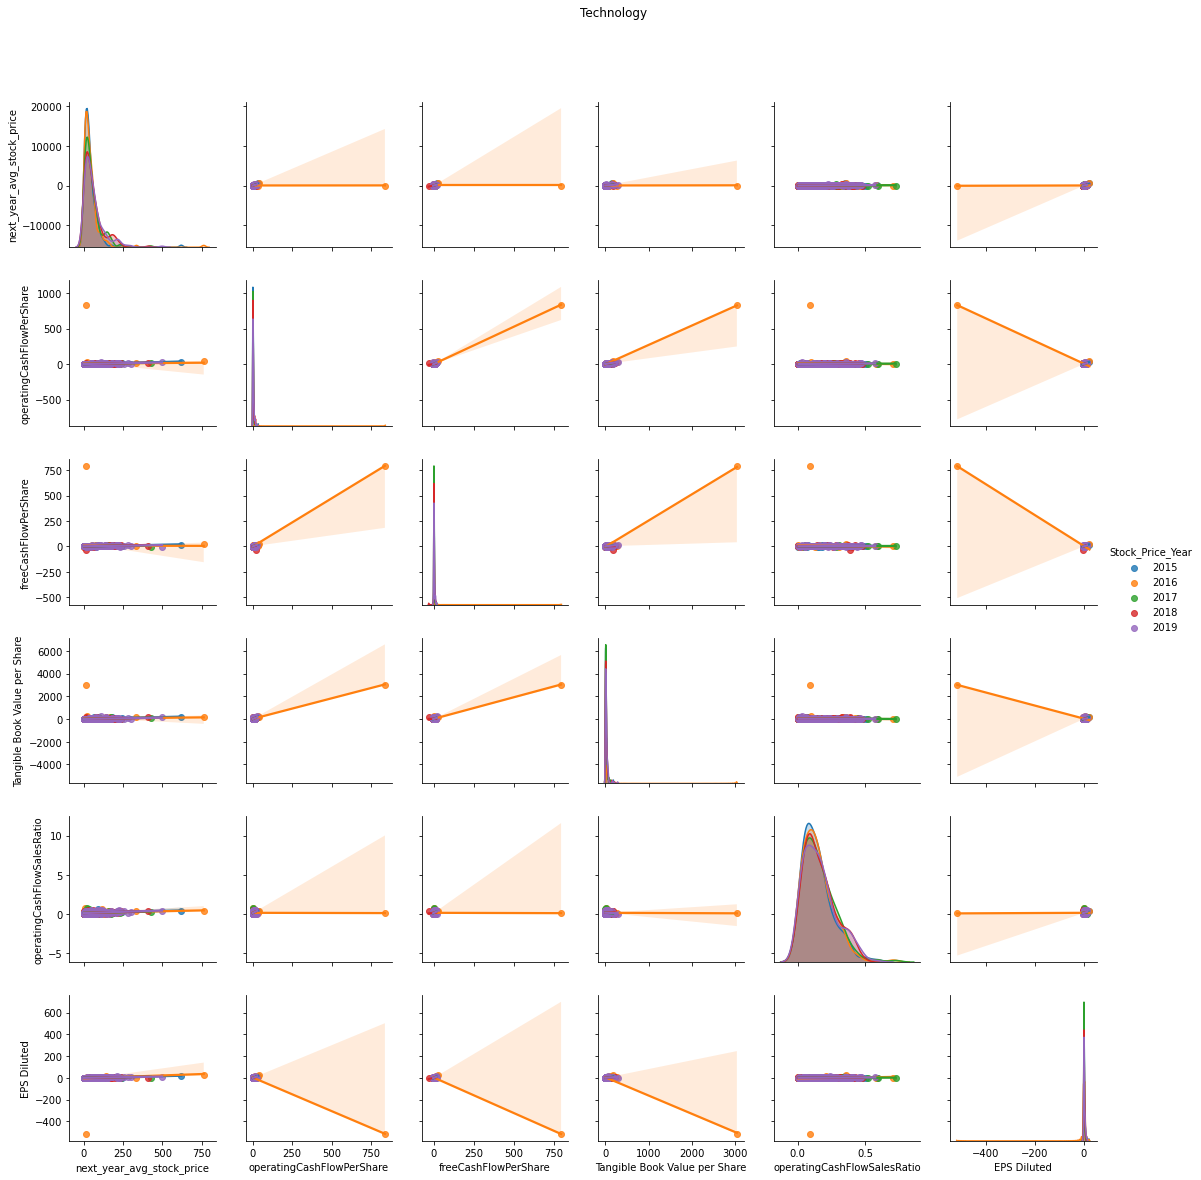

In [54]:
technology=sns.pairplot(pd.concat([merge_technology[top5_correlation_technology.Top5_Ratio],
                        merge_technology.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
technology.fig.suptitle('Technology',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [55]:
top5_correlation_technology=top5_correlation_technology[1:]
X=merge_technology[top5_correlation_technology['Top5_Ratio']]
Y=merge_technology['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.595
Model:                                   OLS   Adj. R-squared:                  0.593
Method:                        Least Squares   F-statistic:                     255.2
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):          9.66e-168
Time:                               21:15:08   Log-Likelihood:                -4469.8
No. Observations:                        875   AIC:                             8952.
Df Residuals:                            869   BIC:                             8980.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.4956      2.675      2.429      0.015       1.246      11.745
operatingCashFlowPerShare         7.7212      0.772     10.001      0.000       6.206       9.236
freeCashFlowPerShare             -1.1554      0.609     -1.898      0.058      -2.350       0.039
Tangible Book Value per Share    -0.1220      0.081     -1.515      0.130      -0.280       0.036
operatingCashFlowSalesRatio      47.5354     13.534      3.512      0.000      20.972      74.099
EPS Diluted                       9.9791      0.347     28.795      0.000       9.299      10.659
==============================================================================
Omnibus:                      442.435   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8140.638
Skew:                           1.855   Prob(JB):                         0.00
Kurtosis:                      17.475   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can only explain 60% of the stock price in technology sector. Thus, we should not rely heavily on the financial ratios when predicting the stock price in this sector. Macroecnomic factors should be carefully evaluated as well.

Text(0.5, 1.08, 'Utilities')

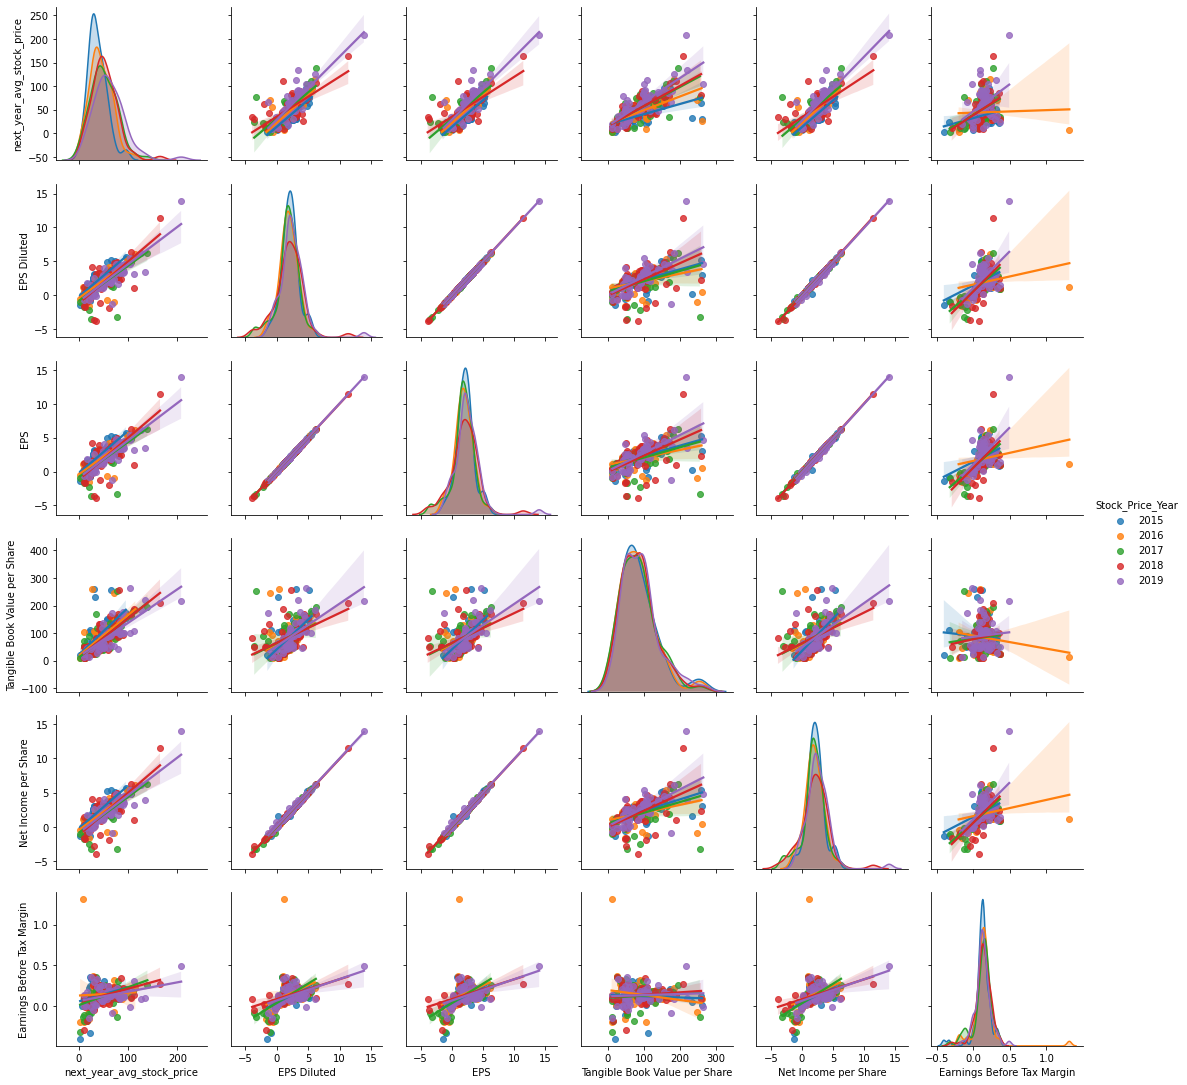

In [56]:
utilities=sns.pairplot(pd.concat([merge_utilities[top5_correlation_utilities.Top5_Ratio],
                        merge_utilities.Stock_Price_Year],axis='columns'),
             dropna=True,hue='Stock_Price_Year',kind='reg')
technology.fig.suptitle('Utilities',y=1.08)

Per the pairplot above, we can see that each of the top 5 ratios is only moderately correlated with stock price. Thus, multi linear correlation should be considered.

In [57]:
top5_correlation_utilities=top5_correlation_utilities[1:]
X=merge_utilities[top5_correlation_utilities['Top5_Ratio']]
Y=merge_utilities['next_year_avg_stock_price']
regr=linear_model.LinearRegression()
regr.fit(X,Y)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print_model=model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     next_year_avg_stock_price   R-squared:                       0.713
Model:                                   OLS   Adj. R-squared:                  0.708
Method:                        Least Squares   F-statistic:                     156.5
Date:                       Sat, 31 Oct 2020   Prob (F-statistic):           3.66e-83
Time:                               21:15:45   Log-Likelihood:                -1312.7
No. Observations:                        321   AIC:                             2637.
Df Residuals:                            315   BIC:                             2660.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            12.7385      1.853      6.873      0.000       9.092      16.385
EPS Diluted                      12.1881     43.711      0.279      0.781     -73.814      98.190
EPS                              -3.7243     44.436     -0.084      0.933     -91.154      83.705
Tangible Book Value per Share     0.2273      0.021     11.022      0.000       0.187       0.268
Net Income per Share             -0.5467      5.919     -0.092      0.926     -12.193      11.100
Earnings Before Tax Margin        5.4535      7.436      0.733      0.464      -9.177      20.084
==============================================================================
Omnibus:                       22.067   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.148
Skew:                           0.044   Prob(JB):                     4.81e-17
Kurtosis:                       5.369   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Per the OLS regression result above, the multi linear regression model with top 5 financial ratios can explain 71% of the stock price in utilities sector. Thus, the combination of top 5 financial ratios is considered a good indicator for future stock price in this sector.